In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [4]:
def prepro(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mask = np.zeros((gray.shape),np.uint8)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

    close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
    div = np.float32(gray)/(close)
    res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
    res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
    plt.imshow(res2)
    return res2, res, mask
    

In [5]:
m = cv2.imread("S5.jpeg")
ref = cv2.imread("blank-sudoku-grid.png")
ref_g = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

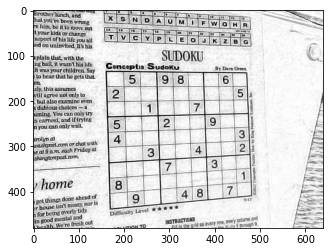

In [6]:
mo, mg, mask = prepro(m)

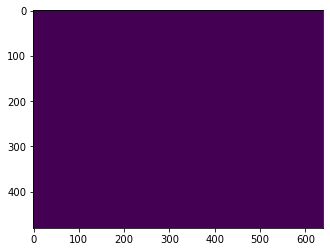

In [7]:
plt.imshow(mask)

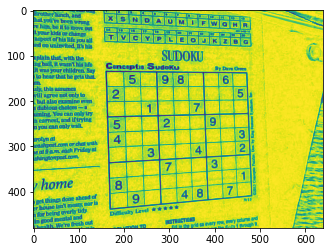

In [8]:
plt.imshow(mg)


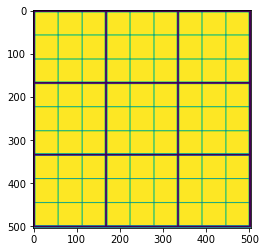

In [9]:
plt.imshow(ref_g)

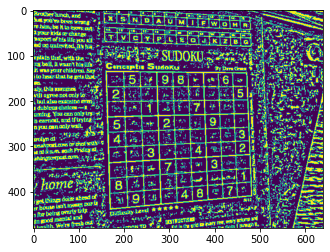

In [10]:
thresh = cv2.adaptiveThreshold(mg,255,0,1,19,2)
contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh)
max_area = 0
best_cnt = None
for cnt in contour:
    area = cv2.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

t1 = cv2.drawContours(mask,[best_cnt],0,255,-1)

t2 = cv2.drawContours(mask,[best_cnt],0,0,2)


res = cv2.bitwise_and(mg,mask)

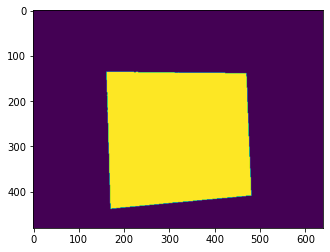

In [11]:
plt.imshow(mask)

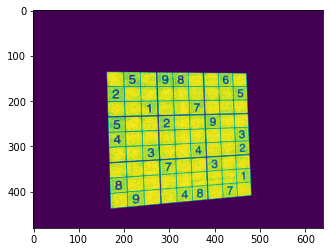

In [315]:
plt.imshow(res)

In [316]:
type(best_cnt)

numpy.ndarray

[160 133]
[160 154]
[161 155]
[161 181]
[162 182]
[162 185]
[161 186]
[161 188]
[162 189]
[162 215]
[163 216]
[163 218]
[162 219]
[162 225]
[163 226]
[163 234]
[162 235]
[162 236]
[163 237]
[163 249]
[164 250]
[164 262]
[163 263]
[164 264]
[164 292]
[165 293]
[165 316]
[166 317]
[166 359]
[167 360]
[167 385]
[168 386]
[168 426]
[169 427]
[169 439]
[174 439]
[175 438]
[184 438]
[185 437]
[193 437]
[194 436]
[204 436]
[205 435]
[214 435]
[215 434]
[226 434]
[227 433]
[235 433]
[236 432]
[247 432]
[248 431]
[257 431]
[258 430]
[268 430]
[269 429]
[278 429]
[279 428]
[288 428]
[289 427]
[299 427]
[300 426]
[308 426]
[309 425]
[320 425]
[321 424]
[331 424]
[332 423]
[343 423]
[344 422]
[353 422]
[354 421]
[362 421]
[363 420]
[373 420]
[374 419]
[384 419]
[385 418]
[396 418]
[397 417]
[406 417]
[407 416]
[417 416]
[418 415]
[429 415]
[430 414]
[440 414]
[441 413]
[449 413]
[450 412]
[453 412]
[454 413]
[455 413]
[456 412]
[461 412]
[462 411]
[470 411]
[471 410]
[482 410]
[483 409]
[483 396]


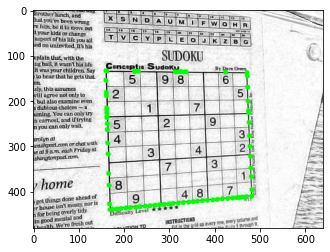

In [317]:
uwu = mo.copy()
for i in best_cnt:
    print(i[0])
    cv2.circle(uwu,(i[0][0], i[0][1]), 5, (0,255,0), -1)
    
plt.imshow(uwu)

(160, 133)
(483, 409)
(160, 133)
(169, 439)


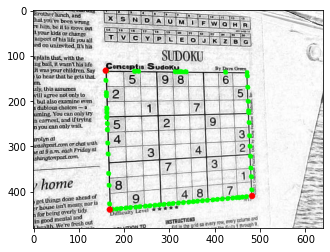

In [318]:
extLeft = tuple(best_cnt[best_cnt[:, :, 0].argmin()][0])
extRight = tuple(best_cnt[best_cnt[:, :, 0].argmax()][0])
extTop = tuple(best_cnt[best_cnt[:, :, 1].argmin()][0])
extBot = tuple(best_cnt[best_cnt[:, :, 1].argmax()][0])

ext = [extLeft,extRight,extTop,extBot]

for p in ext:
    
    print(p)
    cv2.circle(uwu,p, 7, (255,0,0), -1)
    
plt.imshow(uwu)

In [319]:
extLeft == extTop

True

[160 133]
[162 133]


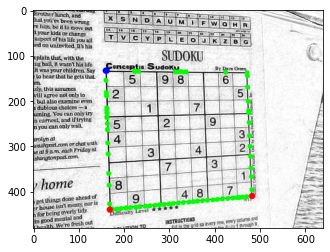

In [320]:
for k in best_cnt[best_cnt[:, :, 1] == 133]:
    print(k)
    cv2.circle(uwu,tuple(k), 7, (0,0,255), -1)
    
plt.imshow(uwu)
    
    


In [321]:
res.shape

(480, 640)

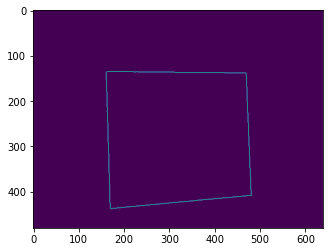

In [322]:
canny = cv2.Canny(mask, 120, 255, 1)
plt.imshow(canny)

In [323]:
corners = cv2.goodFeaturesToTrack(canny,4,0.5,50)

479.0 406.0
172.0 435.0
468.0 140.0
163.0 137.0


<ipython-input-324-1360510368e3>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(uwu2,(x,y),5,(36,255,12),-1)
<ipython-input-324-1360510368e3>:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(uwu2,'{},{}'.format(int(x),int(y)),(x,y),2,1,(255,0,0))


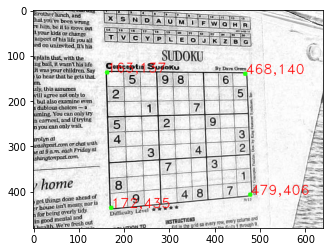

In [324]:
uwu2 = mo.copy()
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(uwu2,(x,y),5,(36,255,12),-1)
    cv2.putText(uwu2,'{},{}'.format(int(x),int(y)),(x,y),2,1,(255,0,0))
    print(x,y)

plt.imshow(uwu2)

In [325]:
pA = corners[0][0]
pB = corners[1][0]
pC = corners[2][0]
pD = corners[3][0]


In [326]:
wAB = np.sqrt((pA[0]-pB[0])**2 + (pA[1]-pB[1])**2)
wDC = np.sqrt((pD[0]-pC[0])**2 + (pD[1]-pC[1])**2)
maxW = max(wAB,wDC)

hCA = np.sqrt((pC[0]-pA[0])**2 + (pC[1]-pA[1])**2)
hDB = np.sqrt((pD[0]-pB[0])**2 + (pD[1]-pB[1])**2)
maxH = max(hCA, hDB)

In [327]:
m.shape
mH = m.shape[0]
mW = m.shape[1]

In [328]:
maxW

308.36666486505965

In [329]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = (nodes - node)**2
    print(dist_2.reshape(4,2))
    n = np.sum(dist_2.astype("int"),axis=-1)

    return np.argmin(n)


In [330]:
corners

array([[[479., 406.]],

       [[172., 435.]],

       [[468., 140.]],

       [[163., 137.]]], dtype=float32)

In [331]:
H


252

In [332]:
pA = corners[closest_node([0,0],corners)]
pB = corners[closest_node([0,mH-1],corners)]
pC = corners[closest_node([mW-1,mH-1],corners)]
pD = corners[closest_node([mW-1,0],corners)]

[[229441. 164836.]
 [ 29584. 189225.]
 [219024.  19600.]
 [ 26569.  18769.]]
[[229441.   5329.]
 [ 29584.   1936.]
 [219024. 114921.]
 [ 26569. 116964.]]
[[ 25600.   5329.]
 [218089.   1936.]
 [ 29241. 114921.]
 [226576. 116964.]]
[[ 25600. 164836.]
 [218089. 189225.]
 [ 29241.  19600.]
 [226576.  18769.]]


In [333]:
pB


array([[172., 435.]], dtype=float32)

In [334]:
H = W = 252

In [335]:
output_pts = np.float32([[0, 0],
                        [0, H - 1],
                        [W - 1, H - 1],
                        [W - 1, 0]])



In [336]:
input_pts = np.float32([pA, pB, pC, pD])

In [337]:
M = cv2.getPerspectiveTransform(input_pts,output_pts)

In [338]:
out = cv2.warpPerspective(mo,M,(W, H),flags=cv2.INTER_LINEAR)

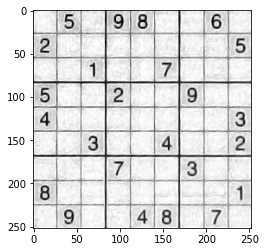

In [339]:
plt.imshow(out)